
# **Investigate Hotel Business using Data Visualization**

Author :Tushar Pawar

---
<br>

**Table of Content:**
- Introduction
- Load Dataset
- Data Exploration
- Data Cleansing
- Data Visualization
<br>
<br>

# **Introduction**

**Background** <br>
Business performance analysis is a crucial key for companies to achieve success in their operations. Companies can conduct analyses to identify issues, weaknesses, and strengths. In the hospitality industry, understanding customer behavior is essential. By grasping customer behavior, companies can determine the factors influencing customers in hotel reservations. Additionally, companies can identify products or services that may be less popular in the market. This is done to adjust effective business strategies, allowing the company to enhance customer experiences and achieve long-term business goals.<br>
<br>

**Business Questions** <br>
- What types of hotels are most frequently visited by customers?
- Does the duration of the stay influence the hotel reservation cancellation rate?
- Does the time gap between hotel reservation and guest arrival date affect the hotel reservation cancellation rate?<br>
<br>

**Objective** <br>
Create data-based visualizations to provide insights for the hotel business
<br>
<br>

# **Load Dataset**

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('hotel_bookings_data.csv')

In [3]:
df.sample(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
90728,City Hotel,0,3,2018,August,24,7,0,3,1,...,0,No Deposit,7.0,NaN,0,Personal,109.85,0,2,Check-Out
46175,City Hotel,0,0,2017,February,52,21,1,0,2,...,0,No Deposit,9.0,NaN,0,Personal,75.00,0,0,Check-Out
101178,City Hotel,0,52,2018,January,45,5,1,1,2,...,0,No Deposit,83.0,NaN,0,Personal,77.76,0,0,Check-Out


<br>
<br>

# **Data Exploration**


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Key Takeaways :
- The dataset comprises 119,390 records and 29 features.
- Data types: object, float64, int64
- There are 33,261 duplicate entries in the dataset.
<br>
<br>

In [5]:

for col in df.columns:
    print("{} have {} unique values: {}".format(col, df[col].nunique(), df[col].dtypes))
    if df[col].dtypes == 'int64' or df[col].dtypes == 'float64' or df[col].dtypes == 'object':
        print("{} values: {}".format(col,df[col].unique()))
        print('-' * 100)

hotel have 2 unique values: object
hotel values: ['Resort Hotel' 'City Hotel']
----------------------------------------------------------------------------------------------------
is_canceled have 2 unique values: int64
is_canceled values: [0 1]
----------------------------------------------------------------------------------------------------
lead_time have 479 unique values: int64
lead_time values: [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 46

### Checking Null Values
---

In [6]:
# cek missing value
((df.isna().sum())/len(df)*100).round(2).sort_values(ascending=False)

company                           94.31
agent                             13.69
city                               0.41
hotel                              0.00
distribution_channel               0.00
total_of_special_requests          0.00
required_car_parking_spaces        0.00
adr                                0.00
customer_type                      0.00
days_in_waiting_list               0.00
deposit_type                       0.00
booking_changes                    0.00
previous_bookings_not_canceled     0.00
previous_cancellations             0.00
is_repeated_guest                  0.00
market_segment                     0.00
is_canceled                        0.00
meal                               0.00
babies                             0.00
children                           0.00
adults                             0.00
stays_in_weekdays_nights           0.00
stays_in_weekend_nights            0.00
arrival_date_day_of_month          0.00
arrival_date_week_number           0.00


Key Takeaways :
-  **missing/null value**  **`company`**, **`city`**, **`children`**, **`agent`**
- Imputation of values will be performed to address the missing values.
<br>
<br>

### Checking Duplicated Data
---

In [7]:
# cek data duplicat
df.duplicated().sum()

33261

### Statistical Descriptive
---

#### Numerical Feature

In [8]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.37,0.48,0.00,0.00,0.00,1.0,1.0
lead_time,119390.0,104.01,106.86,0.00,18.00,69.00,160.0,737.0
arrival_date_year,119390.0,2018.16,0.71,2017.00,2018.00,2018.00,2019.0,2019.0
arrival_date_week_number,119390.0,27.17,13.61,1.00,16.00,28.00,38.0,53.0
arrival_date_day_of_month,119390.0,15.80,8.78,1.00,8.00,16.00,23.0,31.0
stays_in_weekend_nights,119390.0,0.93,1.00,0.00,0.00,1.00,2.0,19.0
stays_in_weekdays_nights,119390.0,2.50,1.91,0.00,1.00,2.00,3.0,50.0
adults,119390.0,1.86,0.58,0.00,2.00,2.00,2.0,55.0
children,119386.0,0.10,0.40,0.00,0.00,0.00,0.0,10.0
babies,119390.0,0.01,0.10,0.00,0.00,0.00,0.0,10.0


- The feature `adr`, **Averange Daily Rate** (room revenue/number of room sold)  contains **value negatif**. This is an **anomali** and needs to be dropped..
<br>
<br>

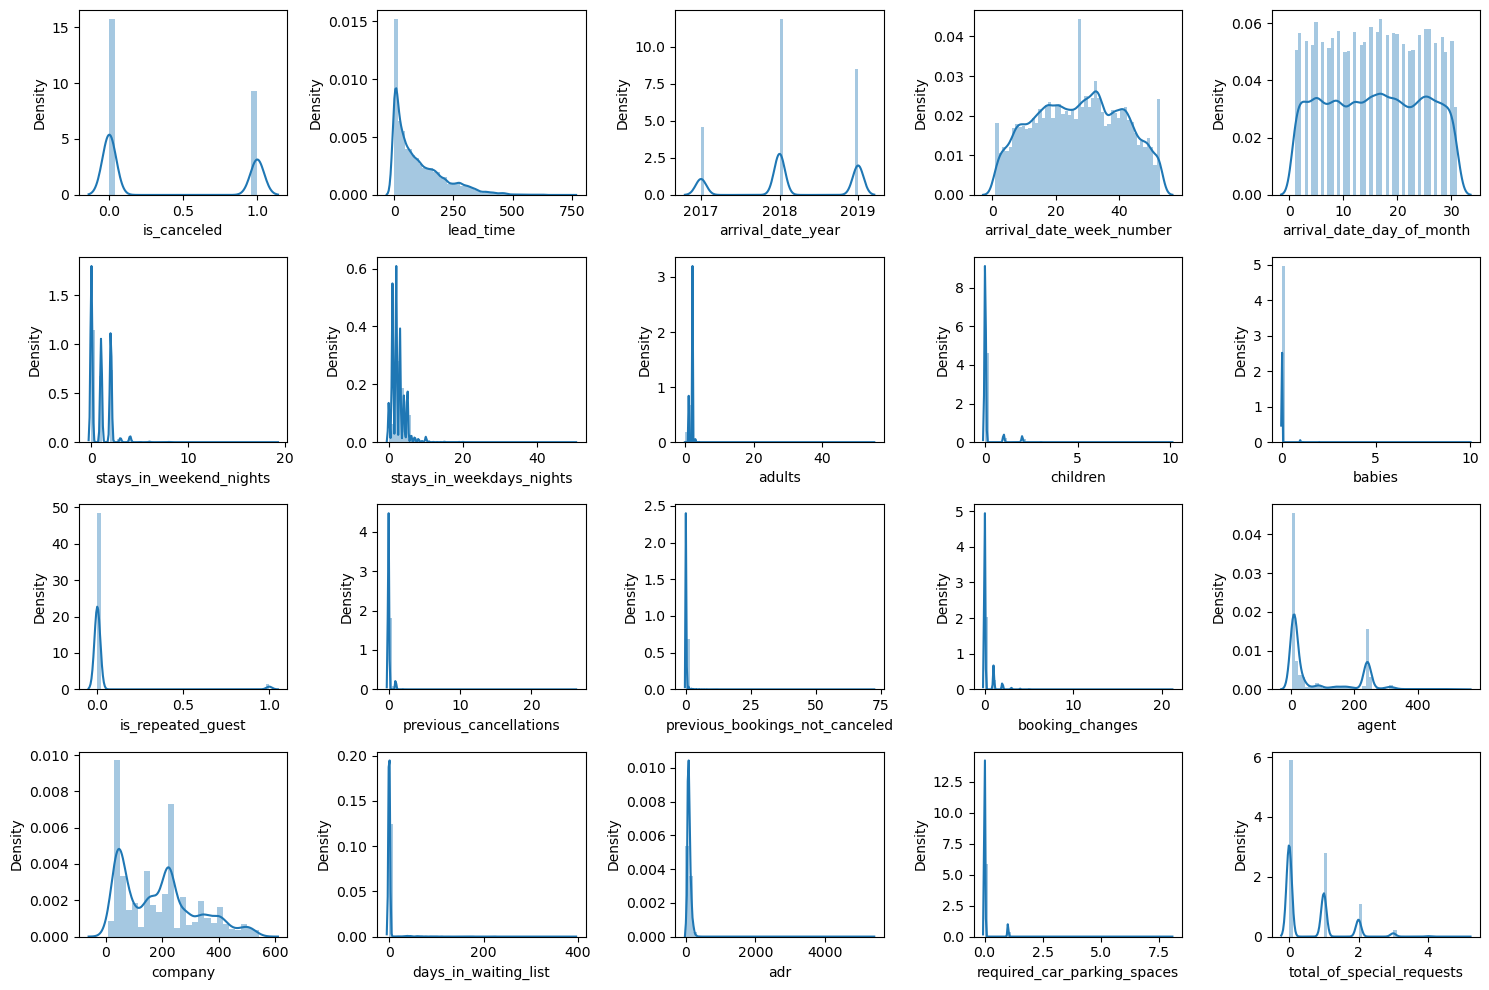

In [9]:
# cek distribusi 
nums = df.loc[:, (df.dtypes == 'int64') | (df.dtypes == float)].columns.tolist()

plt.figure(figsize=(15, 10))
for i in range(0, len(nums)):
    plt.subplot(4, 5, i+1)
    sns.distplot(df[nums[i]])
    plt.tight_layout()

Key Takeaways:
- Overall, the features tend to be **positively skewed**
- `arrival_date_week_number` and `arrival_date_day_of_month` have distributions that tend to be normal.
<br>
<br>

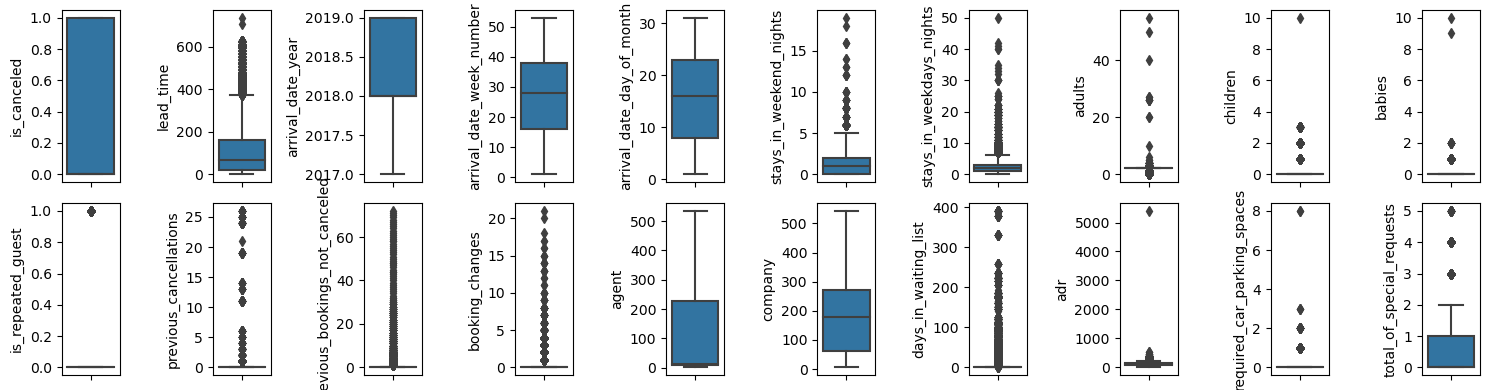

In [10]:
# cek outlier 
plt.figure(figsize=(15, 4))
for i in range(0, len(nums)):
    plt.subplot(2, 10, i+1)
    sns.boxplot(y=df[nums[i]], orient='v')
    plt.tight_layout()

In [11]:
guest_0 = df['adults']+df['children']+df['babies']
guest_0 = df[guest_0 == 0]
guest_0.shape[0]

180

Key takeaways:
- There are **180 rooms without guests**.
- This data will be **dropped** later on.
<br>
<br>

#### Categorical Feature

In [12]:
df.describe(exclude=np.number).round(2).T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,October,13877
meal,119390,5,Breakfast,92310
city,118902,177,Kota Denpasar,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Personal,89613
reservation_status,119390,3,Check-Out,75166


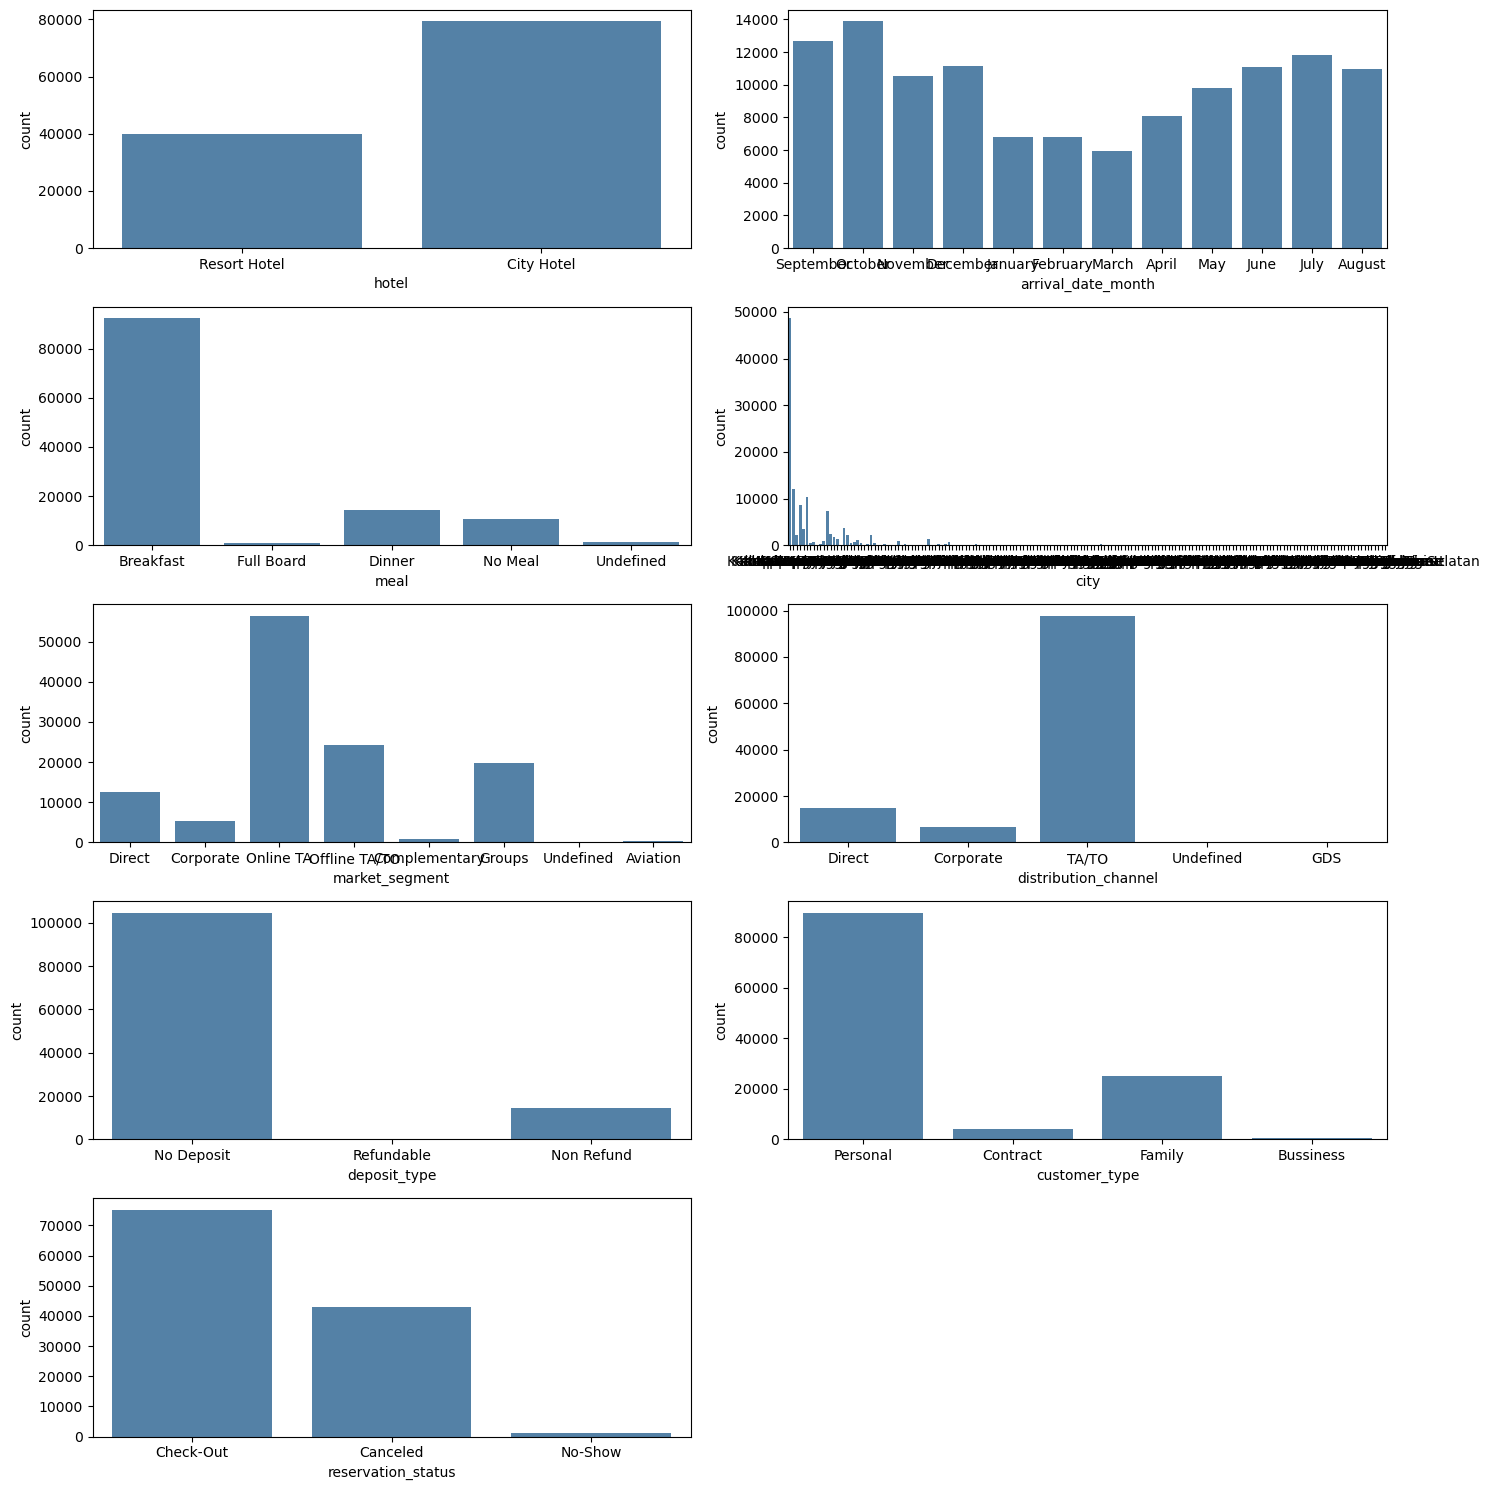

In [13]:
# cek distribusi fitur kategorikal
cats = df.loc[:, (df.dtypes == 'object')].columns.tolist()
plt.figure(figsize=(15, 15))
for i in range(0, len(cats)):
    plt.subplot(5, 2, i+1)
    sns.countplot(x=df[cats[i]], color='steelblue')
    plt.tight_layout()

<br>
<br>

# **Data Cleansing**

In [14]:
df_clean = df.copy()

### Handling Null Values
---

In [15]:
# company, agent, children
ft = ['company', 'children', 'agent']
for col in ft:
    df_clean[col].fillna(0, inplace=True)

# ----------------------------------------------------------------
# city
df_clean['city'].fillna('Undefined', inplace=True)

In [16]:
df_clean.isna().sum().sum()

0

<br>

### Handling Inconsistent and Extream Values
---

The **meal** feature can be categorized into two groups: 'With Meal' and 'No Meal'.
- **'With Meal'** = Breakfast, Full Board, Dinner
- **'No Meal'** = No Meal, Undefined

In [17]:
df_clean['meal'].replace('Undefined', 'No Meal', inplace = True)
df_clean['meal'].replace(['Breakfast', 'Full Board', 'Dinner'], 'With Meal', inplace = True)

In [18]:
df_clean['meal'].unique()

array(['With Meal', 'No Meal'], dtype=object)

<br>

The **Children** feature should be changed to the integer data type.

In [19]:
df_clean['children'] = df_clean['children'].astype('int64')

In [20]:
# extream adr
index_adr = df_clean[(df_clean['adr'] < 0) | (df_clean['adr'] > 5000)]
df_clean.drop(index = index_adr.index, inplace=True)

# --------------------------------------------------------------------------------
# required_car_parking_spaces
index_parking = df_clean[(df_clean['required_car_parking_spaces'] == 8)]
df_clean.drop(index = index_parking.index, inplace=True)

# --------------------------------------------------------------------------------

index_bb = df_clean[(df_clean['babies'] > 8)]
df_clean.drop(index = index_bb.index, inplace=True)

# --------------------------------------------------------------------------------

index_ch = df_clean[(df_clean['children'] == 10)]
df_clean.drop(index = index_ch.index, inplace=True)

# --------------------------------------------------------------------------------

index_guest_0 = df_clean['adults']+df_clean['children']+df_clean['babies']
index_guest_0 = df_clean[index_guest_0 == 0]
df_clean.drop(index = index_guest_0.index, inplace=True)

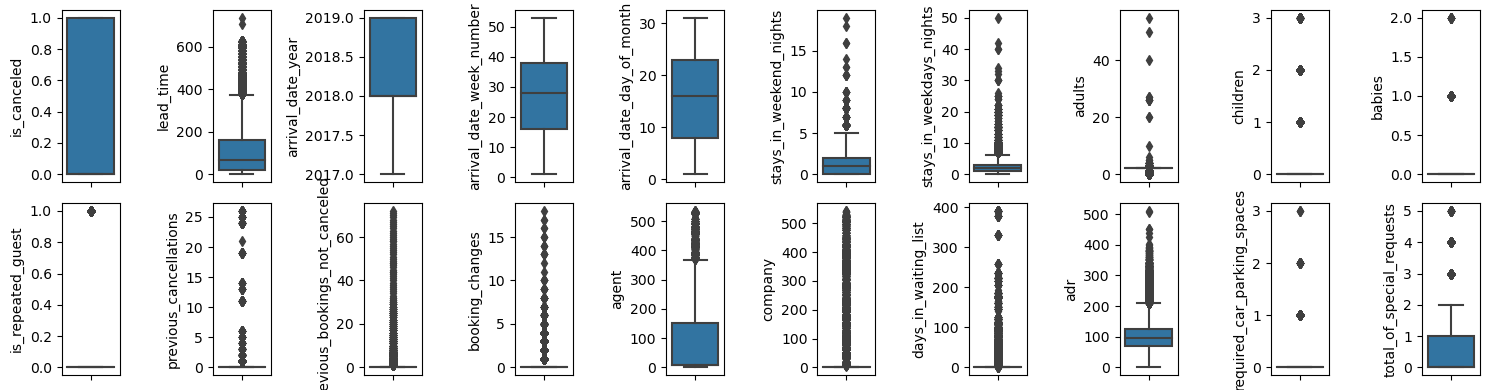

In [21]:
# cek outlier 
plt.figure(figsize=(15, 4))
for i in range(0, len(nums)):
    plt.subplot(2, 10, i+1)
    sns.boxplot(y=df_clean[nums[i]], orient='v')
    plt.tight_layout()

<br>

### Handling Duplicated Data
---

In [22]:
df_clean.sample(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
84481,City Hotel,0,0,2018,April,9,27,0,0,1,...,1,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out
81425,City Hotel,0,0,2018,June,17,20,0,1,2,...,1,No Deposit,0.0,45.0,0,Personal,0.0,0,1,Check-Out


In [23]:
## drop data duplikat
# df_clean.drop_duplicates(keep='first', inplace=True)

In [24]:
print('Total Records Before Cleaned :', df.shape[0])
print('Total Records After Cleaned :', df_clean.shape[0])

Total Records Before Cleaned : 119390
Total Records After Cleaned : 119203


# **Data Visualization**

## **Monthly Hotel Booking Analysis Based on Hotel Type**

Analisis ini berfokus untuk melihat trend dari pemesanan hotel untuk setiap jenis hotel. 

In [25]:

df_c = df_clean.copy()

### Ratio Total Booking 
---

In [26]:
# summary persentase total booking

hotel_type = df_c.groupby('hotel')[['hotel']].count()
#-------------------------------------------------------------------
hotel_type.columns = ['total']
hotel_type.reset_index(inplace=True)
hotel_type

,hotel,total
0,City Hotel,79160
1,Resort Hotel,40043


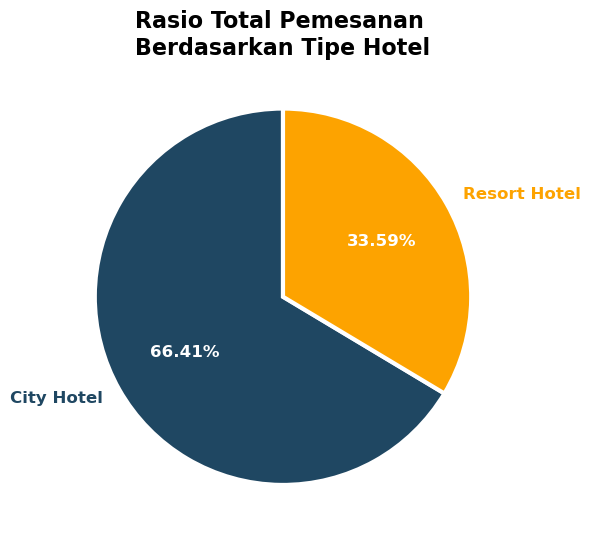

In [27]:
fig, ax = plt.subplots(figsize=(6, 6))
#-------------------------------------------------------------------
patches, texts, pcts = ax.pie(
    hotel_type['total'], labels=hotel_type['hotel'], autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'large'},
    startangle=90, colors=['#1f4762', '#fda300'])
#-------------------------------------------------------------------
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white', fontweight='bold')
plt.setp(texts, fontweight=600)
ax.set_title('Rasio Total Pemesanan \nBerdasarkan Tipe Hotel', fontsize=16, pad=5, loc='center',fontweight='bold')
plt.tight_layout()

Key takeaways:

- **City Hotel is booked 66.41% more often by customers.**
- It is suspected that the majority of customers booking City Hotel are **travelers whose main activities are around the place they stay**, rather than the hotel itself being their primary destination.
- City hotels are usually located in the city center or urban areas, close to tourist and business destinations. They are typically designed to provide comfort and easy access to facilities and activities in the city, such as restaurants, shopping centers, and tourist attractions.
- The remaining 33.59% are customers booking Resort Hotel. Customers booking this hotel are presumed to have the intention of vacationing and relaxing at the location, as Resort hotels are usually situated in beautiful places like beachfronts, mountains, or serene rural areas with comprehensive facilities. <br>
<br>

### Ratio Total Booking per Month
---

In [28]:

monthly_booking = df_c.groupby(['hotel', 'arrival_date_month'])['arrival_date_year'].agg(['nunique', 'count']).reset_index()
monthly_booking

,hotel,arrival_date_month,nunique,count
0,City Hotel,April,2,4950
1,City Hotel,August,2,7885
2,City Hotel,December,2,7593
3,City Hotel,February,2,4114
4,City Hotel,January,2,4336
5,City Hotel,July,2,8221
6,City Hotel,June,2,7469
7,City Hotel,March,2,3729
8,City Hotel,May,2,6433
9,City Hotel,November,2,7392


It can be observed that the majority of each month's count in the dataset has a count of 2 for the nunique column, except for the months of **October** and **September**. This discrepancy can potentially affect the accuracy of calculations, leading to less valid results. To address this issue, normalization is carried out by calculating the **average** (total/nunique).

#### Normalization

In [29]:

monthly_booking['average'] = round(monthly_booking['count']/monthly_booking['nunique'])
monthly_booking

,hotel,arrival_date_month,nunique,count,average
0,City Hotel,April,2,4950,2475.0
1,City Hotel,August,2,7885,3942.0
2,City Hotel,December,2,7593,3796.0
3,City Hotel,February,2,4114,2057.0
4,City Hotel,January,2,4336,2168.0
5,City Hotel,July,2,8221,4110.0
6,City Hotel,June,2,7469,3734.0
7,City Hotel,March,2,3729,1864.0
8,City Hotel,May,2,6433,3216.0
9,City Hotel,November,2,7392,3696.0


#### Sort Month Value

In [30]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
#---------------------------------------------------------------------------------------------
monthly_booking['month'] = monthly_booking['arrival_date_month'].str[:3]
monthly_booking['month'] = pd.Categorical(monthly_booking['month'], categories=months)
monthly_booking.sort_values('month')

,hotel,arrival_date_month,nunique,count,average,month
4,City Hotel,January,2,4336,2168.0,Jan
16,Resort Hotel,January,2,2435,1218.0,Jan
3,City Hotel,February,2,4114,2057.0,Feb
15,Resort Hotel,February,2,2645,1322.0,Feb
7,City Hotel,March,2,3729,1864.0,Mar
19,Resort Hotel,March,2,2191,1096.0,Mar
0,City Hotel,April,2,4950,2475.0,Apr
12,Resort Hotel,April,2,3102,1551.0,Apr
20,Resort Hotel,May,2,3331,1666.0,May
8,City Hotel,May,2,6433,3216.0,May


#### Visualization

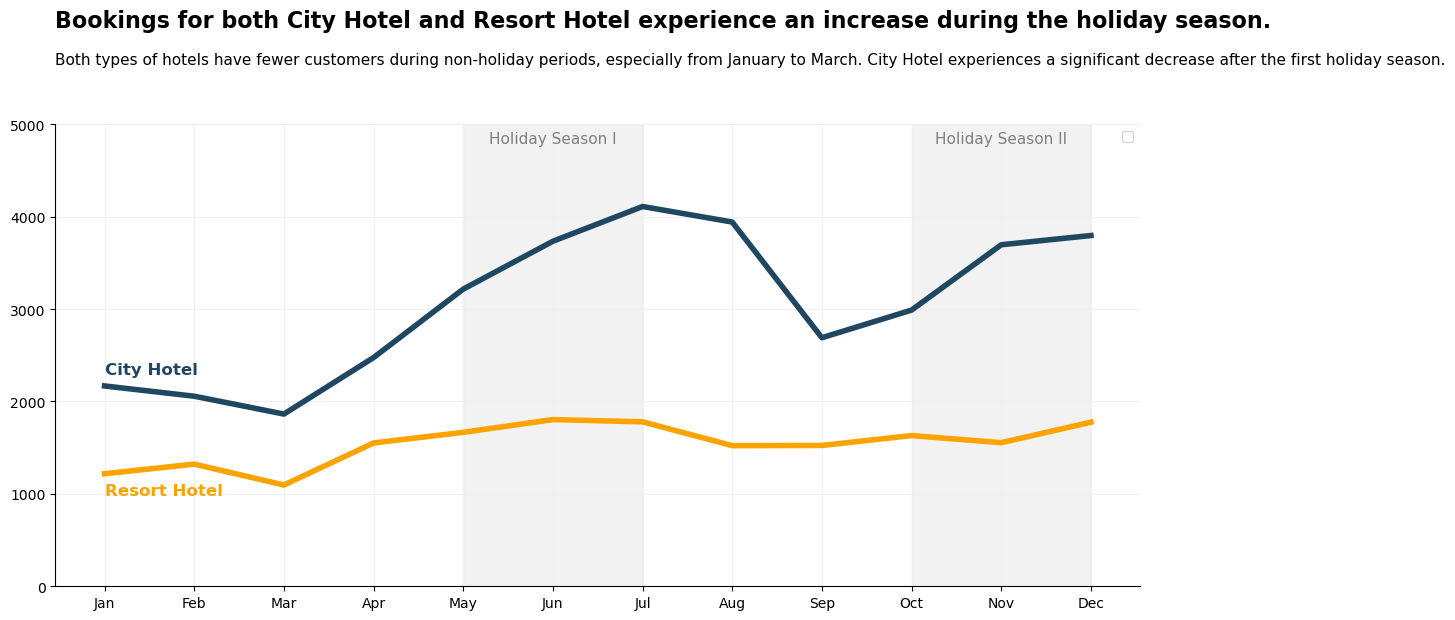

In [32]:
plt.style.use('default')
fig, ax = plt.subplots()
fig.set_size_inches(14, 6)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Creating the plot
sns.lineplot(x='month', y='average', hue='hotel', data=monthly_booking, palette=['#1f4762', '#fda300'], linewidth=4)
plt.grid(color='#f0f0f0')
plt.ylim(0, 5000)

# Adjusting labels
plt.tick_params(axis='both', which='major', labelsize=10)
plt.ylabel('')
plt.xlabel('')

# Adding legend
ax.legend([])  # Use ax to specify the legend of the subplot
plt.text(x=0, y=2300, s='City Hotel', fontsize=12, color='#1f4762', ha='left', fontweight='bold')
plt.text(x=0, y=990, s='Resort Hotel', fontsize=12, color='#fda300', ha='left', fontweight='bold')

# Adding title and description
plt.title('Bookings for both City Hotel and Resort Hotel experience an increase during the holiday season.', fontsize=16, pad=70, loc='left', fontweight='bold')
plt.text(y=5700, x=-0.55, s='Both types of hotels have fewer customers during non-holiday periods, especially from January to March. City Hotel experiences a significant decrease after the first holiday season.', ha='left', va='center', size=11)

# Setting holiday seasons
plt.stackplot([4, 5, 6], [5000], color='grey', alpha=0.1)
plt.text(x=5, y=4800, s='Holiday Season I', fontsize=11, color='grey', ha='center')

plt.stackplot([9, 10, 11], [5000], color='grey', alpha=0.1)
plt.text(x=10, y=4800, s='Holiday Season II', fontsize=11, color='grey', ha='center')

# Display the plot
plt.show()


Key Takeaways:
- Ketika musim liburan, pemesanan hotel cenderung mengalami peningkatan.
- Pemesanan kedua tipe hotel pada perode bulan **Mei - Agustus** memiliki nilai tertinggi, apalgi untuk City Hotel mengalami peningkatan yang signifikan pada periode waktu tersebut. Hal ini dapat dikarenakan pada **2017-2019** pada bulan Mei - Agustus selain **liburan sekolah**, juga bertepatan dengan **banyaknya hari libur nasional** seperti cuti bersama dan even keagamaan seperti ramadhan dan lebaran. Sehingga banyak kesempatan untuk masyarakat menfaatkan waktunya untuk berlibur, berkunjung ke luar kota, dan melakukan pemesanan hotel. Sedangkan pada musim liburan **Oktober - Desember** bertepatan depan dengan natal dan **tahun baru**.
- Tingkat pemesanan terendah terjadi pada periode Januari - Maret. Hal ini dapat dikarenakan sedikit sekali hari libur nasional, awal tahun ajaran baru bagi pelajar, dan memiliki aktivitas perjalanan bisnis yang tidak sibut karena masih awal tahun.

 <br>
 <br>

## **Impact Analysis of Stay Duration on Hotel Bookings Cancelation Rate**



### Total Cancelation Rate
---

In [33]:
df_city = df_c[df_c['hotel']=='City Hotel']

cancel = df_city.groupby('is_canceled')[['is_canceled']].count()
#-------------------------------------------------------------------
cancel.columns = ['total']
cancel.reset_index(inplace=True)

lgn = {0: 'Not Canceled',
       1: 'Canceled'}
cancel['is_canceled'] = cancel['is_canceled'].map(lgn)
cancel


,is_canceled,total
0,Not Canceled,46082
1,Canceled,33078


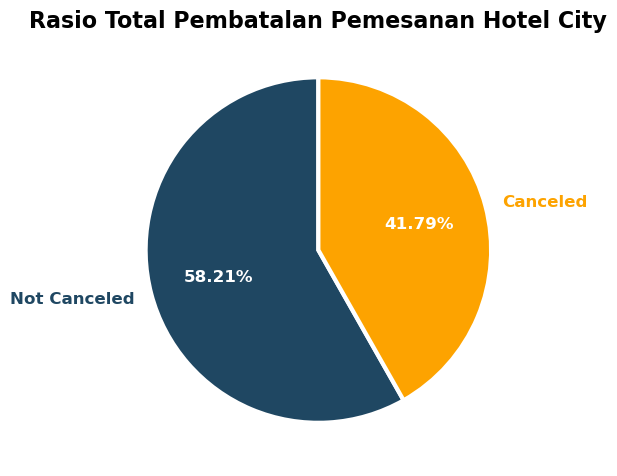

In [34]:
fig, ax = plt.subplots(figsize=(6, 6))
#-------------------------------------------------------------------
patches, texts, pcts = ax.pie(
    cancel['total'], labels=cancel['is_canceled'], autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'large'},
    startangle=90, colors=['#1f4762', '#fda300'])
#-------------------------------------------------------------------
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white', fontweight='bold')
plt.setp(texts, fontweight=600)
ax.set_title('Rasio Total Pembatalan Pemesanan Hotel City', fontsize=16, pad=5, loc='center',fontweight='bold')
plt.tight_layout()

In [35]:
df_resort = df_c[df_c['hotel']=='Resort Hotel']

# group fitur iscanceled dan agregasi menggunakan count
cancel = df_resort.groupby('is_canceled')[['is_canceled']].count()
#-------------------------------------------------------------------
cancel.columns = ['total']
cancel.reset_index(inplace=True)

lgn = {0: 'Not Canceled',
       1: 'Canceled'}
cancel['is_canceled'] = cancel['is_canceled'].map(lgn)
cancel


,is_canceled,total
0,Not Canceled,28924
1,Canceled,11119


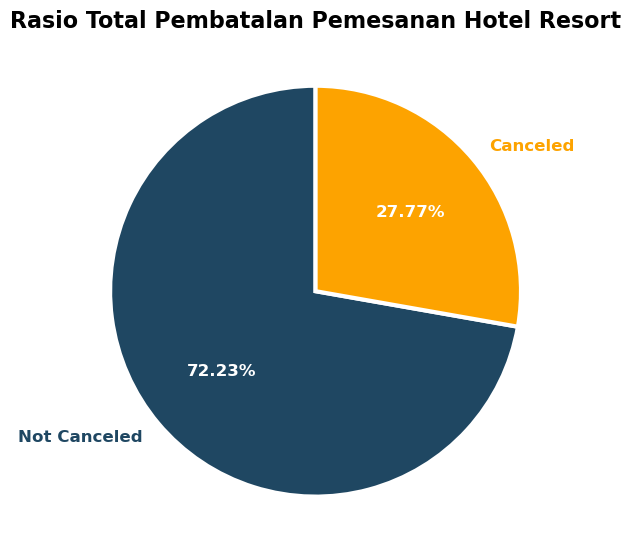

In [36]:
fig, ax = plt.subplots(figsize=(6, 6))
#-------------------------------------------------------------------
patches, texts, pcts = ax.pie(
    cancel['total'], labels=cancel['is_canceled'], autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'large'},
    startangle=90, colors=['#1f4762', '#fda300'])
#-------------------------------------------------------------------
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white', fontweight='bold')
plt.setp(texts, fontweight=600)
ax.set_title('Rasio Total Pembatalan Pemesanan Hotel Resort', fontsize=16, pad=5, loc='center',fontweight='bold')
plt.tight_layout()

City Hotel also has a higher cancellation rate compared to Resort Hotel. This suggests that many customers booking City Hotel tend to cancel their reservations more frequently. Given that City Hotel is centrally located in the city or urban areas, close to tourist and business destinations, there may be a higher volume of activities to manage and potentially other influencing factors leading to a higher rate of reservation cancellations by customers.




.<br>
<br>

### Stay Duration
---


The duration of the stay booked by customers can be observed in the features 'stays_in_weekdays_nights' and 'stays_in_weekend_nights'

In [37]:
# total stay
df_c['total_stay_duration'] = df_c['stays_in_weekdays_nights'] + df_c['stays_in_weekend_nights']
df_c.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_stay_duration
118740,City Hotel,0,7,2019,October,34,23,0,2,2,...,No Deposit,9.0,0.0,0,Personal,196.50,0,1,Check-Out,2
24411,Resort Hotel,0,112,2018,July,21,17,0,3,2,...,No Deposit,240.0,0.0,0,Personal,94.00,1,1,Check-Out,3
110875,City Hotel,0,104,2019,June,18,30,2,1,1,...,No Deposit,9.0,0.0,0,Personal,105.00,0,0,Check-Out,3
4787,Resort Hotel,0,169,2018,May,14,31,1,3,2,...,Refundable,0.0,223.0,0,Family,66.00,0,0,Check-Out,4
56248,City Hotel,1,69,2018,November,36,1,2,6,2,...,No Deposit,9.0,0.0,0,Personal,123.98,0,0,Canceled,8


<Axes: xlabel='total_stay_duration', ylabel='Count'>

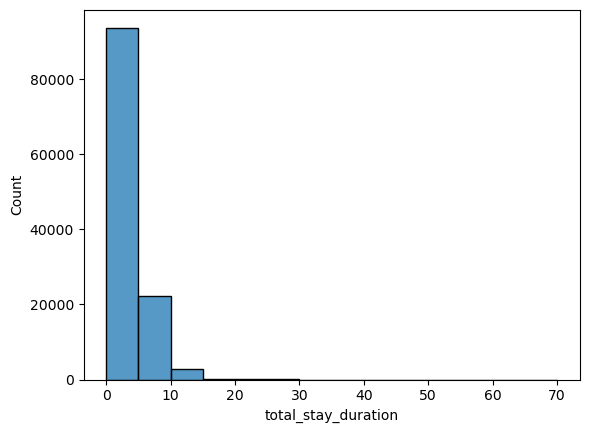

In [38]:

sns.histplot(df_c['total_stay_duration'], binwidth=5)

In [39]:
unik = df_c['total_stay_duration'].nunique()
mx = df_c['total_stay_duration'].max()
mn = df_c['total_stay_duration'].min()

print('Nilai unik:', unik)
print('Max durasi:', mx)
print('Min durasi:', mn)

Nilai unik: 42
Max durasi: 69
Min durasi: 0


Key Takeaways :
The total duration of customer stays ranges from 0 to 69 days. To facilitate interpretation, it will be categorized into weekly duration ranges:

- **< 1: 0 - 7 days**
- **1 - 2: 8 - 14 days**
- **2 - 3: 15 - 21 days**
- **2 - 4: 22 - 28 days**
- **> 4: > 28 days**

In [40]:
df_c['total_stay_week'] = np.where((df_c['total_stay_duration']) < 8, '< 1' ,
                                   np.where((df_c['total_stay_duration']) < 15, '1-2',
                                   np.where((df_c['total_stay_duration']) < 22, '2-3', 
                                   np.where((df_c['total_stay_duration']) < 29, '3-4', '> 4'))))

In [41]:
df_c['total_stay_week'].value_counts()

total_stay_week
< 1    113979
1-2      4795
2-3       274
3-4       108
> 4        47
Name: count, dtype: int64

<br>

### Cancelation Rate by Stay Duration
---

In [42]:
# group cancel rate based on totel type,duration
cancel_rate = df_c.groupby(['hotel', 'total_stay_week']).agg({'is_canceled' : 'sum', 'arrival_date_day_of_month' : 'count'}).reset_index()
cancel_rate['cancel_rate'] = 100*(cancel_rate['is_canceled'] / cancel_rate['arrival_date_day_of_month']).round(2)
cancel_rate

# --------------------------------------------------------------------------------------------------------------------------------------
# sorted by week
week = ['< 1', '1-2', '2-3', '3-4', '> 4']
cancel_rate['total_stay_week'] = pd.Categorical(cancel_rate['total_stay_week'], categories = week)
cancel_rate = cancel_rate.sort_values('total_stay_week')
cancel_rate

,hotel,total_stay_week,is_canceled,arrival_date_day_of_month,cancel_rate
3,City Hotel,< 1,32403,77939,42.0
8,Resort Hotel,< 1,9917,36040,28.0
0,City Hotel,1-2,558,1069,52.0
5,Resort Hotel,1-2,1077,3726,29.0
1,City Hotel,2-3,76,105,72.0
6,Resort Hotel,2-3,79,169,47.0
2,City Hotel,3-4,21,25,84.0
7,Resort Hotel,3-4,39,83,47.0
4,City Hotel,> 4,20,22,91.0
9,Resort Hotel,> 4,7,25,28.0


#### Visualization

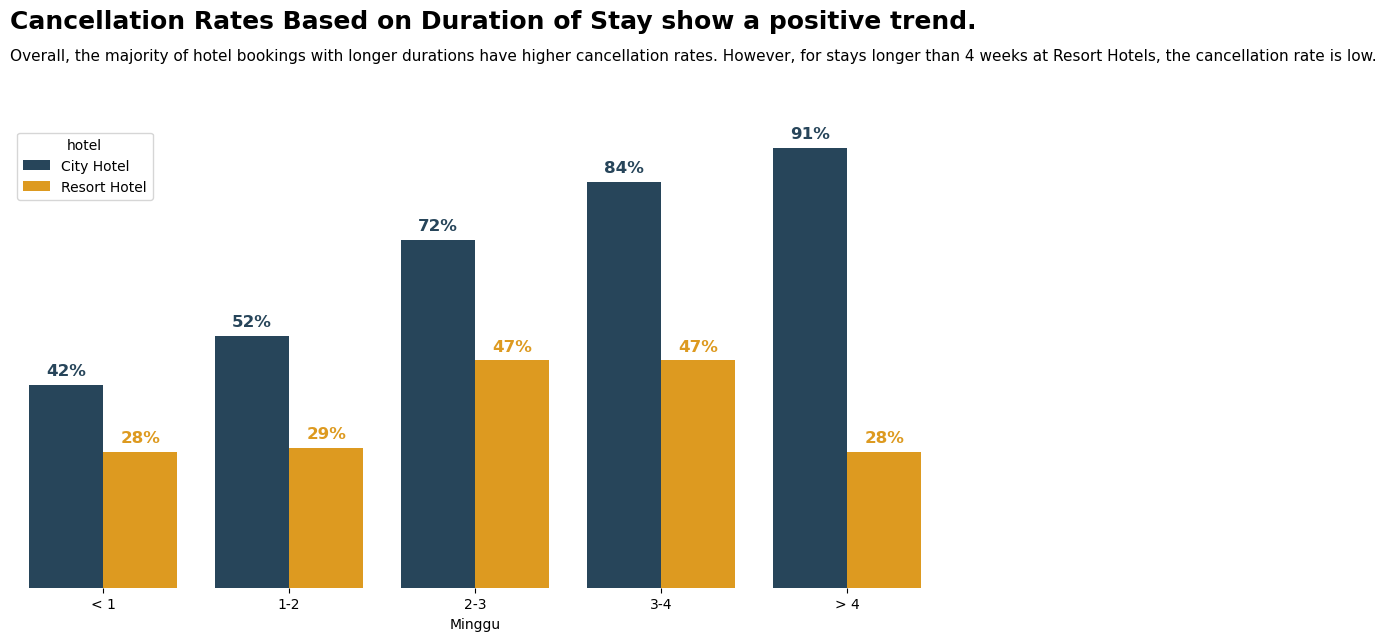

In [43]:
plt.style.use('default')
fig, ax = plt.subplots()
fig.set_size_inches(12,6)

# -----------------------------------------------------------------------------------------------------------------------------
# set border
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

# -----------------------------------------------------------------------------------------------------------------------------
# plot
ax = sns.barplot(x = cancel_rate['total_stay_week'], y = cancel_rate['cancel_rate'], hue=cancel_rate['hotel'], 
                 hue_order = ['City Hotel', 'Resort Hotel'], palette=['#1f4762', '#fda300'])

# -----------------------------------------------------------------------------------------------------------------------------

plt.tick_params(axis = 'y', which = 'both', left = False, right = False, labelleft = False)
plt.ylabel('')
plt.xlabel('Minggu')

# -----------------------------------------------------------------------------------------------------------------------------

plt.title('Cancellation Rates Based on Duration of Stay show a positive trend.', fontsize=18, pad=70, loc='left',fontweight='bold')
plt.text(y = 110, x = -0.5, s = 'Overall, the majority of hotel bookings with longer durations have higher cancellation rates. However, for stays longer than 4 weeks at Resort Hotels, the cancellation rate is low.',
         ha='left', va='center', size=11)


# -----------------------------------------------------------------------------------------------------------------------------
patches
for a in ax.patches:
    txt = np.round(a.get_height(), decimals=2)
    anot = str(round(txt))
    color = a.get_facecolor()
    ax.annotate(anot+'%', (a.get_x()+a.get_width()/2, a.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points', fontsize=12, fontweight='bold', color=color)

Key Takeaways:

- **Cancellation rates increase with the length of stay booked in both types of hotels.**
- For City Hotel, bookings with a duration of more than 2 weeks have a cancellation rate of over 50%. Especially for stays longer than a month, only 1 out of 10 people do not cancel their reservations. This high cancellation rate necessitates the company to formulate effective strategies to minimize cancellations.

 <br>
 <br>

## **Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate**


This analysis focuses on examining the trend of lead time (the time between booking a hotel and the arrival date) and the cancellation rate of hotel reservations.


### Duration of Lead Time
---


To observe the range of lead time in the dataset, you can examine its distribution through a histogram.

<Axes: xlabel='lead_time', ylabel='Count'>

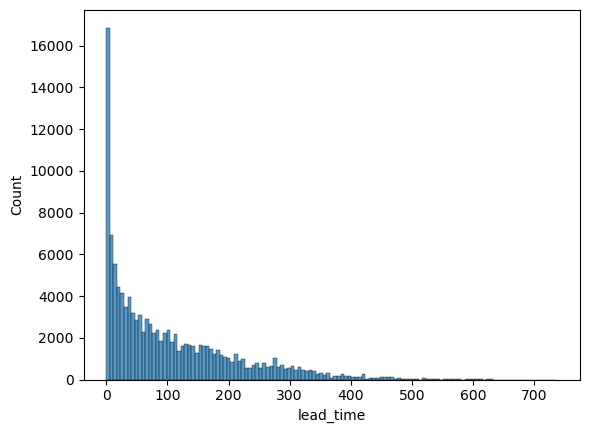

In [44]:

sns.histplot(df_c['lead_time'])

In [45]:
unik = df_c['lead_time'].nunique()
mx = df_c['lead_time'].max()
mn = df_c['lead_time'].min()

print('Nilai unik:', unik)
print('Max durasi:', mx)
print('Min durasi:', mn)

Nilai unik: 479
Max durasi: 737
Min durasi: 0



Lead time ranges from 0 to 709 days. To facilitate interpretation, categorization will be created for better understanding.

In [46]:
df_c['lead_category'] = np.where((df_c['lead_time']) < 31, '1',
                        np.where((df_c['lead_time']) <= 61, '2',
                        np.where((df_c['lead_time']) <= 91, '3', 
                        np.where((df_c['lead_time']) <= 121, '4',
                        np.where((df_c['lead_time']) <= 151, '5',
                        np.where((df_c['lead_time']) <= 181, '6',
                        np.where((df_c['lead_time']) <= 211, '7', 
                        np.where((df_c['lead_time']) <= 241, '8',
                        np.where((df_c['lead_time']) <= 271, '9',
                        np.where((df_c['lead_time']) <= 301, '10', 
                        np.where((df_c['lead_time']) <= 331, '11',
                        np.where((df_c['lead_time']) <= 361, '12', '>1 tahun'))))))))))))

In [47]:
# cek kolom
df_c['lead_category'].value_counts()

lead_category
1           38578
2           17462
3           12398
4           10359
5            8237
6            7784
7            5609
8            4180
10           3524
>1 tahun     3405
9            3377
11           2581
12           1709
Name: count, dtype: int64

<br>

### Cancelation Rate by Lead Time
---

In [48]:
# summmary
lead_cancel = df_c.groupby(['hotel', 'lead_category']).agg({'is_canceled' : 'sum', 'arrival_date_day_of_month' : 'count'}).reset_index()
lead_cancel['lead_cr'] = 100*(lead_cancel['is_canceled'] / lead_cancel['arrival_date_day_of_month']).round(2)

# --------------------------------------------------------------------------------------------------------------------------------------
# sorted
cat = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '>1 tahun']
lead_cancel['lead_category'] = pd.Categorical(lead_cancel['lead_category'], categories = cat)
lead_cancel = lead_cancel.sort_values('lead_category')
lead_cancel

,hotel,lead_category,is_canceled,arrival_date_day_of_month,lead_cr
0,City Hotel,1,5184,23243,22.0
13,Resort Hotel,1,1984,15335,13.0
4,City Hotel,2,4802,12253,39.0
17,Resort Hotel,2,1593,5209,31.0
5,City Hotel,3,3601,8774,41.0
18,Resort Hotel,3,1279,3624,35.0
19,Resort Hotel,4,1157,2993,39.0
6,City Hotel,4,3464,7366,47.0
20,Resort Hotel,5,1040,2537,41.0
7,City Hotel,5,2574,5700,45.0


#### **Visualization**

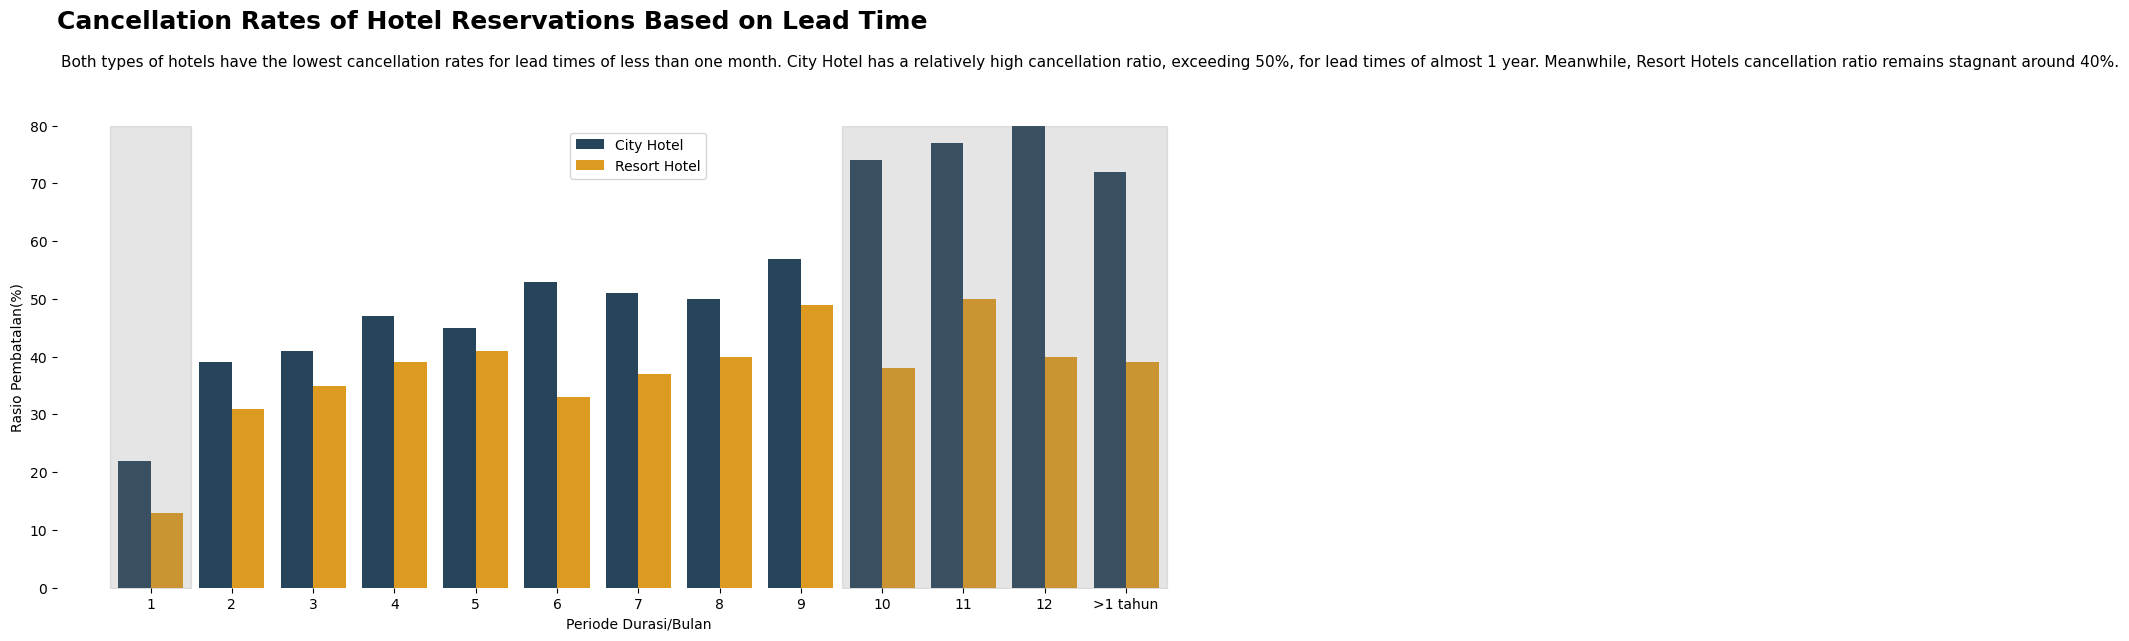

In [49]:

plt.style.use('default')
fig, ax = plt.subplots()
fig.set_size_inches(15,6)

# -----------------------------------------------------------------------------------------------------------
# set border
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

# -----------------------------------------------------------------------------------------------------------
# plot
ax = sns.barplot(x = lead_cancel['lead_category'], y = lead_cancel['lead_cr'], hue=lead_cancel['hotel'], 
                 hue_order = ['City Hotel', 'Resort Hotel'], palette=['#1f4762', '#fda300'])
plt.ylim(0,80)

# -----------------------------------------------------------------------------------------------------------
# mengatur label
plt.ylabel('Rasio Pembatalan(%)')
plt.xlabel('Periode Durasi/Bulan')
plt.legend(loc='upper center')

# -----------------------------------------------------------------------------------------------------------
# menambahkan judul dan deskripsi
plt.title('Cancellation Rates of Hotel Reservations Based on Lead Time', fontsize=18, pad=70, loc='left',fontweight='bold')
plt.text(y = 91, x = -1.1, s = 'Both types of hotels have the lowest cancellation rates for lead times of less than one month. City Hotel has a relatively high cancellation ratio, exceeding 50%, for lead times of almost 1 year. Meanwhile, Resort Hotels cancellation ratio remains stagnant around 40%.',
         ha='left', va='center', size=11)

# -----------------------------------------------------------------------------------------------------------
# set cr 
plt.stackplot([-0.5, 0.5], [80], color='grey', alpha=0.2)
plt.stackplot([8.5, 12.5], [80], color='grey', alpha=0.2)

Key Takeaways:
- Cancellation rates based on lead time are still **dominated by City Hotel**, with cancellation rates tending to be high when the lead time is almost one year.
- Considering the low cancellation rate for lead times of less than one month, the **company can establish booking terms with a maximum booking limit** to minimize the chance of customers canceling reservations due to changing their minds or finding other preferred hotels. <br>
<br>

# **Conclusion**

#### Business Questions Answer <br>
---

#### Which type of hotel is most frequently visited by customers?

Overall, City Hotel is booked 66.41% more often by customers, with a significant increase in the number of customers occurring during holiday seasons in May-July and October-December. Resort hotels tend to have a stagnant trend with a relatively small increase during holiday seasons compared to City Hotel.<br>
<br>

#### Does the duration of stay affect the cancellation rate of hotel reservations?
The cancellation rate will increase with the length of stay booked in both types of hotels, especially for City Hotel, which has a cancellation rate of over 70-90% for stays longer than 3 weeks.<br>
<br>

#### Does the lead time between hotel booking and guest arrival day affect the cancellation rate of hotel reservations?

Cancellation rates will increase with the lead time in both types of hotels. The lowest cancellations occur when the lead time is less than one month.
<br>
<br>